In [42]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Distances & Similarities

# Distances in Euclidian Space

These distances apply when data poins are represented as vectors in $\mathbb{R}^n$. They measure geometric relationships between points.

In [13]:
# Load Iris
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

# Standardize features (important for distances)
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

print("Iris shape:", X_iris_scaled.shape)
print("Classes:", set(y_iris))

Iris shape: (150, 4)
Classes: {np.int64(0), np.int64(1), np.int64(2)}


In [15]:
X_iris[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

## Minkowski Distance
The Minkowski distance generalizes several norms.

$$D_p(x,y) = \left( \sum_{i=1}^n |x_i - y_i|^p \right)^{\frac{1}{p}}$$

- $p=2$ → Euclidean distance
- $p=1$ → Manhattan distance

## Mahalanobis Distance

Mahalanobis distance accounts for correlations in the data, thus measuring 

$$D_M(x,y) = \sqrt{ (x-y)^T \, \Sigma^{-1} \, (x-y) }$$

## Cosine Distance

Cosine distance measures angular difference between vectors, ignoring magnitude.

$$D_{\cos}(x,y) = 1 - \frac{x \cdot y}{\|x\|\|y\|}$$

# Distances Between Objects

When working with sets or strings (or any object in general), different definitions of distance are more appropriate.

[MovieLens](https://grouplens.org/datasets/movielens/)

In [38]:
# Load MovieLens 100k (userId, movieId, rating, timestamp)
ml = pd.read_csv("https://raw.githubusercontent.com/ficstamas/data-mining/ef35c46e65be57364023dd0eca3e6cebee97ec65/data/movielens/ratings.csv")
# movies.csv -> movieId, title, genres
# links.csv -> movieId, imdbId, tmdbId
# tags.csv -> userId, movieId, tag, timestamp

# Build "set of movies watched" for each user
user_movies = ml.groupby("userId")["movieId"].apply(set)

A = user_movies.loc[1]
B = user_movies.loc[2]
user_movies

userId
1      {1024, 1, 1025, 3, 2048, 1029, 6, 1030, 1031, ...
2      {115713, 122882, 48516, 91529, 80906, 91658, 1...
3      {5764, 647, 3210, 527, 914, 1302, 31, 2080, 59...
4      {1025, 3079, 3591, 2571, 3083, 21, 1046, 2583,...
5      {1, 515, 261, 265, 266, 527, 531, 21, 150, 534...
                             ...                        
606    {1, 8195, 6148, 7, 11, 69644, 4109, 15, 17, 18...
607    {1, 517, 2053, 2054, 1544, 3081, 11, 1036, 257...
608    {1, 2, 3, 2052, 2054, 4104, 4105, 10, 2060, 61...
609    {1, 137, 10, 650, 1161, 786, 150, 288, 161, 10...
610    {1, 122882, 122884, 6, 122886, 81932, 73741, 1...
Name: movieId, Length: 610, dtype: object

## Jaccard Similarity

For sets $A$ and $B$, the Jaccard similarity measures overlap:

$$J(A,B) = \frac{|A \cap B|}{|A \cup B|}$$

## Edit (Levenshtein) Distance

Measures how many operations (insertions, deletions, substitutions) are needed to transform one string into another.

$$D_{\text{edit}}(s_1, s_2) = \min \text{(edit operations to convert $s_1$ into $s_2$)}$$

# Distances Between Distributions

When comparing probability distributions, distances capture how different two distributions are.

We’ll illustrate using two Gaussian distributions $p = \mathcal{N}(0,1)$ and $q = \mathcal{N}(1,1)$.

In [27]:
def generate_dummy_points(p_mu=0, p_std=1, q_mu=1, q_std=1):
    # Two Gaussian distributions
    p = norm(p_mu, p_std)
    q = norm(q_mu, q_std)
    
    x = np.linspace(-4, 5, 1000)
    p_pdf = p.pdf(x)
    q_pdf = q.pdf(x)
    return p_pdf, q_pdf, x

In [30]:
@interact(
    p_mu=widgets.FloatSlider(min=-3, max=3, step=0.1, value=0),
    p_std=widgets.FloatSlider(min=0, max=3, step=0.1, value=1),
    q_mu=widgets.FloatSlider(min=-3, max=3, step=0.1, value=1),
    q_std=widgets.FloatSlider(min=0, max=3, step=0.1, value=1),
)
def plot_dist_overlap(p_mu=0, p_std=1, q_mu=1, q_std=1):
    p_pdf, q_pdf, x = generate_dummy_points(p_mu, p_std, q_mu, q_std)
    plt.plot(x, p_pdf, label="p ~ N(0,1)", lw=2)
    plt.plot(x, q_pdf, label="q ~ N(1,1)", lw=2)
    plt.fill_between(x, np.minimum(p_pdf, q_pdf), alpha=0.3, color="gray", label="Overlap")
    plt.title("Two Gaussian Distributions")
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='p_mu', max=3.0, min=-3.0), FloatSlider(value=1.0, de…

In [44]:
# Load MNIST (70k samples, 28x28 images [flattened])
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X_mnist = mnist["data"]
y_mnist = mnist["target"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X_mnist, y_mnist, test_size=0.4, random_state=42, stratify=y_mnist
)

print("MNIST shape:", X_mnist.shape)

# Select digit 0 and digit 1
digit0 = X_train[y_train == 0]
digit1 = X_train[y_train == 1]

# Compute pixel intensity histograms
P, bins = np.histogram(digit0.flatten(), bins=50, density=True)
Q, _ = np.histogram(digit1.flatten(), bins=bins, density=True)

MNIST shape: (70000, 784)


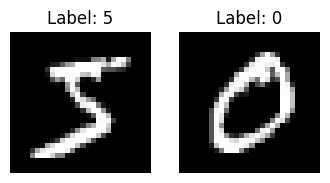

In [45]:
# Select first 2 images
img1 = X_mnist[0].reshape(28,28)
img2 = X_mnist[1].reshape(28,28)

# Plot
plt.figure(figsize=(4,2))

plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.title(f"Label: {y_mnist[0]}")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')
plt.title(f"Label: {y_mnist[1]}")
plt.axis('off')

plt.show()

## Bhattacharyya Distance

The Bhattacharyya coefficient measures overlap:
$$BC(p,q) = \int \sqrt{p(x) q(x)} \, dx,$$
and the distance is:
$$D_B(p,q) = -\ln(BC(p,q))$$

In [34]:
@interact(
    p_mu=widgets.FloatSlider(min=-3, max=3, step=0.1, value=0),
    p_std=widgets.FloatSlider(min=0, max=3, step=0.1, value=1),
    q_mu=widgets.FloatSlider(min=-3, max=3, step=0.1, value=1),
    q_std=widgets.FloatSlider(min=0, max=3, step=0.1, value=1),
)
def plot_bc(p_mu=0, p_std=1, q_mu=1, q_std=1):
    p_pdf, q_pdf, x = generate_dummy_points(p_mu, p_std, q_mu, q_std)
    plt.plot(x, p_pdf, label="p ~ N(0,1)", lw=2)
    plt.plot(x, q_pdf, label="q ~ N(1,1)", lw=2)
    plt.fill_between(x, np.minimum(p_pdf, q_pdf), alpha=0.3, color="gray", label="Overlap")
    
    plt.plot(x, np.sqrt(p_pdf * q_pdf), color="purple", lw=2, label="√(p(x)q(x))")
    plt.fill_between(x, np.sqrt(p_pdf * q_pdf), alpha=0.3, color="purple")
    plt.title("Bhattacharyya Coefficient Visualization")
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='p_mu', max=3.0, min=-3.0), FloatSlider(value=1.0, de…

## Hellinger Distance

$$D_H(p,q) = \sqrt{1 - BC(p,q)}$$

## Kullback-Leibler Divergence

Measures the information loss when $q$ is used to approximate $p$.

$$D_{KL}(p||q) = \int p(x) \, \log \frac{p(x)}{q(x)} \, dx$$

In [33]:
@interact(
    p_mu=widgets.FloatSlider(min=-3, max=3, step=0.1, value=0),
    p_std=widgets.FloatSlider(min=0, max=3, step=0.1, value=1),
    q_mu=widgets.FloatSlider(min=-3, max=3, step=0.1, value=1),
    q_std=widgets.FloatSlider(min=0, max=3, step=0.1, value=1),
)
def plot_kl(p_mu=0, p_std=1, q_mu=1, q_std=1):
    p_pdf, q_pdf, x = generate_dummy_points(p_mu, p_std, q_mu, q_std)
    plt.plot(x, p_pdf, label="p ~ N(0,1)", lw=2)
    plt.plot(x, q_pdf, label="q ~ N(1,1)", lw=2)
    
    kl_integrand = p_pdf * np.log(p_pdf / q_pdf)
    plt.plot(x, kl_integrand, color="red", lw=2, label="KL(p||q)")
    plt.fill_between(x, kl_integrand, alpha=0.3, color="purple")
    plt.axhline(0, color="black", lw=1)
    plt.title("KL Divergence Integrand")
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='p_mu', max=3.0, min=-3.0), FloatSlider(value=1.0, de…